# 1. Import required libraries
# importing essential libraries for data analysis, visualization and machine learning


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib
import warnings
warnings.filterwarnings('ignore')


# 2. load dataset
# loading student performance data from csv file


In [29]:
df = pd.read_csv('StudentPerformanceFactors.csv')

print(f"dataset shape: {df.shape}")
print(f"columns: {list(df.columns)}")
df.head()


dataset shape: (6607, 20)
columns: ['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender', 'Exam_Score']


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


# 3. data cleaning and exploration
# checking for missing values, data types and basic statistics


In [31]:
print("dataset info:")
print(df.info())
print("\nmissing values:")
print(df.isnull().sum())
print("\nstatistical summary:")
print(df.describe())
print("\nunique values in categorical columns:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")


dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 n

# 4. data visualization
# creating visualizations to understand data distribution and relationships


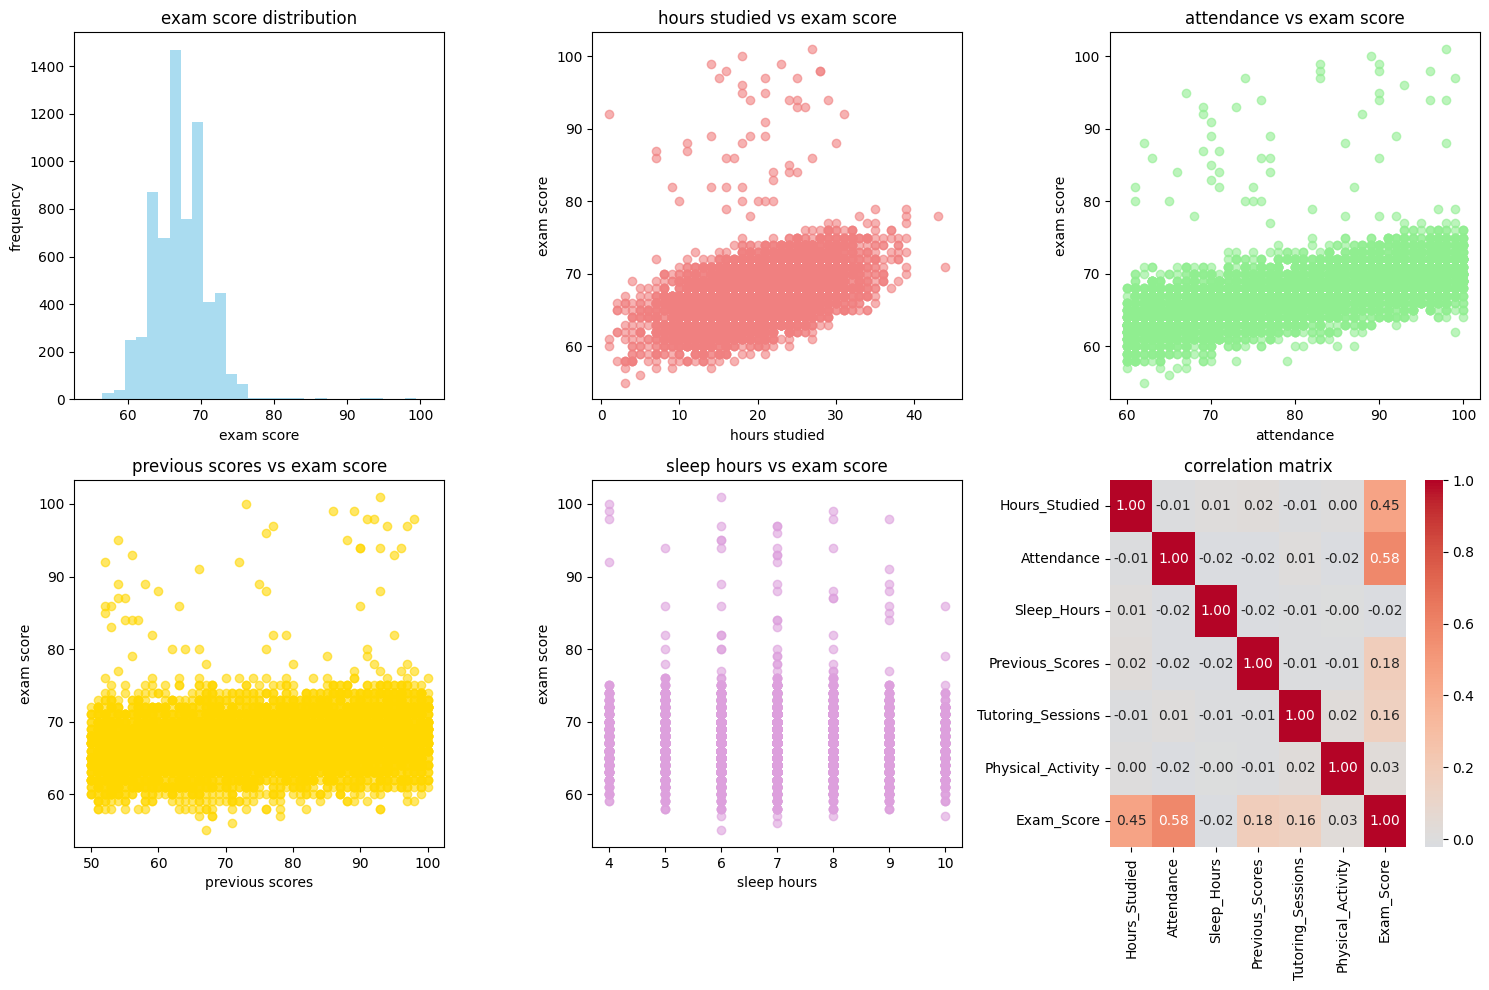

In [33]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.hist(df['Exam_Score'], bins=30, alpha=0.7, color='skyblue')
plt.title('exam score distribution')
plt.xlabel('exam score')
plt.ylabel('frequency')

plt.subplot(2, 3, 2)
plt.scatter(df['Hours_Studied'], df['Exam_Score'], alpha=0.6, color='lightcoral')
plt.title('hours studied vs exam score')
plt.xlabel('hours studied')
plt.ylabel('exam score')

plt.subplot(2, 3, 3)
plt.scatter(df['Attendance'], df['Exam_Score'], alpha=0.6, color='lightgreen')
plt.title('attendance vs exam score')
plt.xlabel('attendance')
plt.ylabel('exam score')

plt.subplot(2, 3, 4)
plt.scatter(df['Previous_Scores'], df['Exam_Score'], alpha=0.6, color='gold')
plt.title('previous scores vs exam score')
plt.xlabel('previous scores')
plt.ylabel('exam score')

plt.subplot(2, 3, 5)
plt.scatter(df['Sleep_Hours'], df['Exam_Score'], alpha=0.6, color='plum')
plt.title('sleep hours vs exam score')
plt.xlabel('sleep hours')
plt.ylabel('exam score')

plt.subplot(2, 3, 6)
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('correlation matrix')

plt.tight_layout()
plt.show()


# 5. data preprocessing and encoding
# encoding categorical variables and preparing features for modeling


In [35]:
from sklearn.preprocessing import LabelEncoder

df_processed = df.copy()

categorical_columns = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities',
                      'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality',
                      'School_Type', 'Peer_Influence', 'Learning_Disabilities', 
                      'Parental_Education_Level', 'Distance_from_Home', 'Gender']

encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df_processed[f'{col}_encoded'] = le.fit_transform(df_processed[col])
    encoders[col] = le

features = ['Hours_Studied', 'Attendance', 'Parental_Involvement_encoded', 'Access_to_Resources_encoded',
           'Extracurricular_Activities_encoded', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level_encoded',
           'Internet_Access_encoded', 'Tutoring_Sessions', 'Family_Income_encoded', 'Teacher_Quality_encoded',
           'School_Type_encoded', 'Peer_Influence_encoded', 'Physical_Activity', 'Learning_Disabilities_encoded',
           'Parental_Education_Level_encoded', 'Distance_from_Home_encoded', 'Gender_encoded']

x = df_processed[features]
y = df_processed['Exam_Score']

print(f"features shape: {x.shape}")
print(f"target shape: {y.shape}")
print(f"feature columns: {list(x.columns)}")


features shape: (6607, 19)
target shape: (6607,)
feature columns: ['Hours_Studied', 'Attendance', 'Parental_Involvement_encoded', 'Access_to_Resources_encoded', 'Extracurricular_Activities_encoded', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level_encoded', 'Internet_Access_encoded', 'Tutoring_Sessions', 'Family_Income_encoded', 'Teacher_Quality_encoded', 'School_Type_encoded', 'Peer_Influence_encoded', 'Physical_Activity', 'Learning_Disabilities_encoded', 'Parental_Education_Level_encoded', 'Distance_from_Home_encoded', 'Gender_encoded']


# 6. split dataset
# dividing data into training and testing sets for model evaluation


In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(f"training set shape: {x_train.shape}")
print(f"testing set shape: {x_test.shape}")
print(f"training target shape: {y_train.shape}")
print(f"testing target shape: {y_test.shape}")


training set shape: (5285, 19)
testing set shape: (1322, 19)
training target shape: (5285,)
testing target shape: (1322,)


# 7. train linear regression model
# creating and training a linear regression model to predict exam scores


In [39]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

y_pred_linear = linear_model.predict(x_test)

print("linear regression model trained successfully")
print(f"model coefficients shape: {linear_model.coef_.shape}")
print(f"model intercept: {linear_model.intercept_:.2f}")


linear regression model trained successfully
model coefficients shape: (19,)
model intercept: 40.15


# 8. evaluate linear regression model
# calculating performance metrics for the linear regression model


In [41]:
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)

print("linear regression performance:")
print(f"mean squared error: {mse_linear:.2f}")
print(f"root mean squared error: {rmse_linear:.2f}")
print(f"mean absolute error: {mae_linear:.2f}")
print(f"r-squared score: {r2_linear:.4f}")


linear regression performance:
mean squared error: 4.40
root mean squared error: 2.10
mean absolute error: 1.02
r-squared score: 0.6886


# 9. train polynomial regression model
# creating polynomial features and training polynomial regression for comparison


In [43]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.transform(x_test)

poly_model = LinearRegression()
poly_model.fit(x_train_poly, y_train)

y_pred_poly = poly_model.predict(x_test_poly)

print("polynomial regression model trained successfully")
print(f"polynomial features shape: {x_train_poly.shape}")
print(f"original features: {x_train.shape[1]}, polynomial features: {x_train_poly.shape[1]}")


polynomial regression model trained successfully
polynomial features shape: (5285, 209)
original features: 19, polynomial features: 209


# 10. evaluate polynomial regression model
# calculating performance metrics for polynomial regression and comparing with linear model


In [45]:
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)

print("polynomial regression performance:")
print(f"mean squared error: {mse_poly:.2f}")
print(f"root mean squared error: {rmse_poly:.2f}")
print(f"mean absolute error: {mae_poly:.2f}")
print(f"r-squared score: {r2_poly:.4f}")

print("\nmodel comparison:")
print(f"linear regression r2: {r2_linear:.4f}")
print(f"polynomial regression r2: {r2_poly:.4f}")
print(f"improvement: {((r2_poly - r2_linear) / r2_linear * 100):.2f}%")


polynomial regression performance:
mean squared error: 3.55
root mean squared error: 1.88
mean absolute error: 0.61
r-squared score: 0.7491

model comparison:
linear regression r2: 0.6886
polynomial regression r2: 0.7491
improvement: 8.78%


# 11. visualize predictions
# creating plots to compare actual vs predicted values for both models


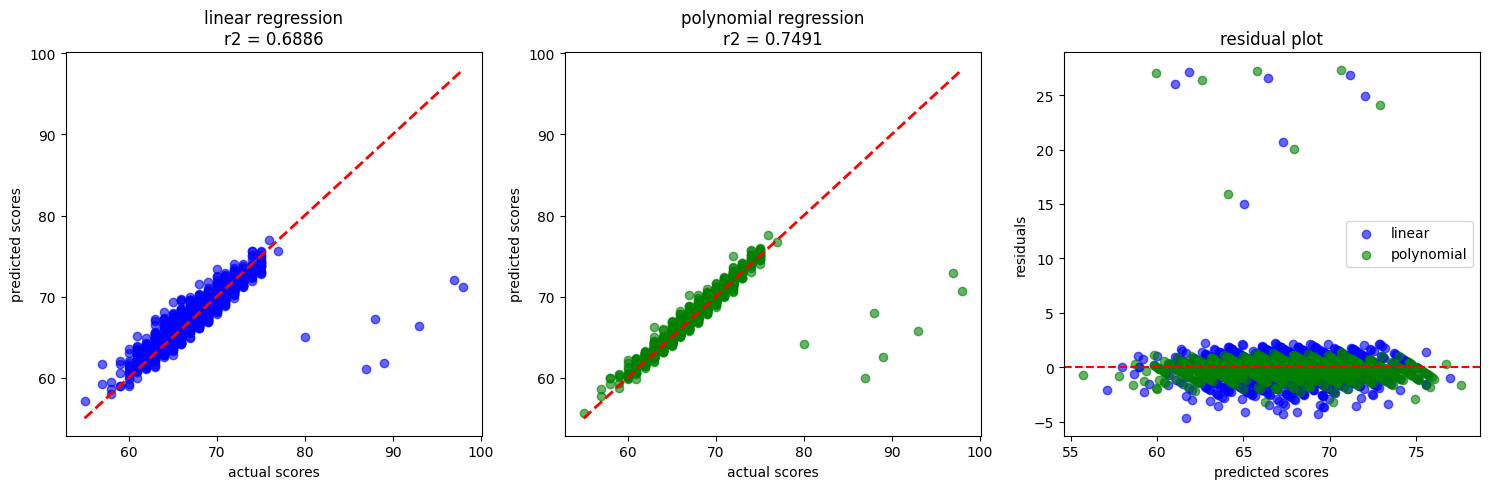

In [47]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_linear, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('actual scores')
plt.ylabel('predicted scores')
plt.title(f'linear regression\nr2 = {r2_linear:.4f}')

plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_poly, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('actual scores')
plt.ylabel('predicted scores')
plt.title(f'polynomial regression\nr2 = {r2_poly:.4f}')

plt.subplot(1, 3, 3)
residuals_linear = y_test - y_pred_linear
residuals_poly = y_test - y_pred_poly
plt.scatter(y_pred_linear, residuals_linear, alpha=0.6, color='blue', label='linear')
plt.scatter(y_pred_poly, residuals_poly, alpha=0.6, color='green', label='polynomial')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('predicted scores')
plt.ylabel('residuals')
plt.title('residual plot')
plt.legend()

plt.tight_layout()
plt.show()


# 12. feature importance analysis
# analyzing which features contribute most to the prediction


feature importance (linear regression coefficients):
                               feature  coefficient  abs_coefficient
8              Internet_Access_encoded     0.968491         0.968491
15       Learning_Disabilities_encoded    -0.876974         0.876974
4   Extracurricular_Activities_encoded     0.567475         0.567475
13              Peer_Influence_encoded     0.534574         0.534574
9                    Tutoring_Sessions     0.502450         0.502450
2         Parental_Involvement_encoded    -0.445248         0.445248
17          Distance_from_Home_encoded     0.442246         0.442246
3          Access_to_Resources_encoded    -0.404069         0.404069
0                        Hours_Studied     0.288644         0.288644
11             Teacher_Quality_encoded    -0.230931         0.230931
1                           Attendance     0.197930         0.197930
14                   Physical_Activity     0.174030         0.174030
10               Family_Income_encoded    -0.16839

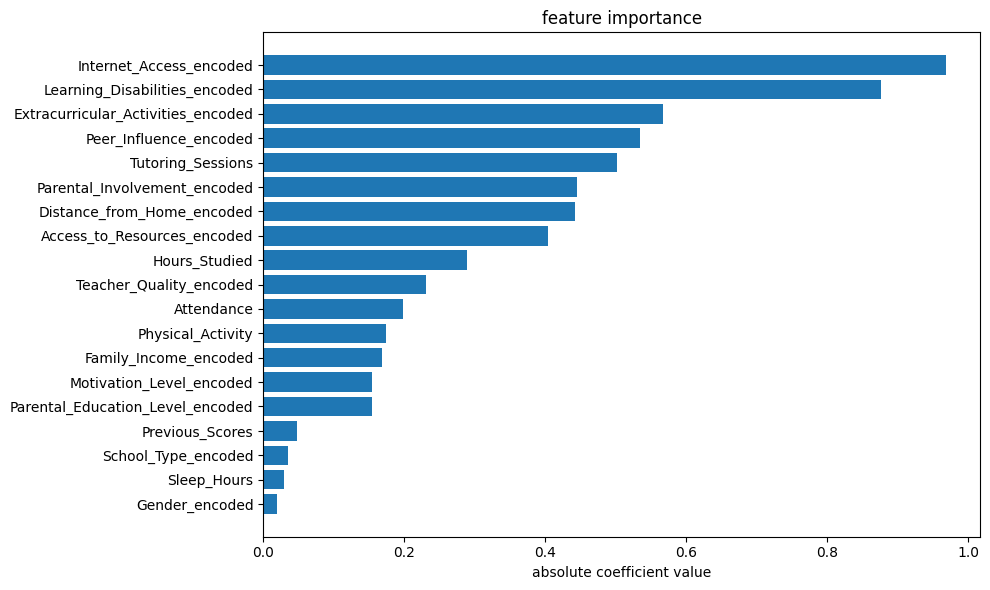

In [49]:
feature_importance = pd.DataFrame({
    'feature': features,
    'coefficient': linear_model.coef_,
    'abs_coefficient': np.abs(linear_model.coef_)
}).sort_values('abs_coefficient', ascending=False)

print("feature importance (linear regression coefficients):")
print(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['abs_coefficient'])
plt.xlabel('absolute coefficient value')
plt.title('feature importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


# 13. save models for deployment
# saving trained models and feature information for use in streamlit app


In [51]:
joblib.dump(linear_model, 'linear_model.pkl')
joblib.dump(poly_model, 'poly_model.pkl')
joblib.dump(poly_features, 'poly_features.pkl')
joblib.dump(features, 'feature_names.pkl')
joblib.dump(encoders, 'encoders.pkl')

model_info = {
    'linear_r2': r2_linear,
    'poly_r2': r2_poly,
    'linear_mse': mse_linear,
    'poly_mse': mse_poly
}
joblib.dump(model_info, 'model_info.pkl')

print("models saved successfully:")
print("- linear_model.pkl")
print("- poly_model.pkl") 
print("- poly_features.pkl")
print("- feature_names.pkl")
print("- encoders.pkl")
print("- model_info.pkl")


models saved successfully:
- linear_model.pkl
- poly_model.pkl
- poly_features.pkl
- feature_names.pkl
- encoders.pkl
- model_info.pkl
